# Creating forcing datasets for pySUMMA

Here we will put together forcing data setups for CAMELs.
This requires hourly forcings of
 - temperature (K)
 - precipitation (kg/m^2/s^1)
 - shortwave radiation (W/m^2)
 - longwave radiation (W/m^2)
 - specific humidity (g/g)
 - air pressure (Pa)
 - wind speed (m/s)
 
NLDAS hourly forcings are considered to be "truth". 
We take NLDAS hourly forcings and give them their mean daily values for each variable in turn (or all variables). 
Then we take NLDAS daily forcings of maximum and minimum temperature, total precipitation, and mean windspeed; and redistribute them to hourly with calculation of the other variables using the MetSim python package. 
Lastly, take NLDAS forcings (hourly) and give them their MetSim valuesv or each variable in turn (or all variables). 

Before we start, the first thing we need to do is make sure SUMMA and pysumma are installed. Commands:
* `cd /path/to/home`
* `github clone https://github.com/ashleymedin/summa.git`
* `cd summa`
* `github checkout develop`
* `cd build`

In the makefile, at a minimum you will need to set the following:
* F_MASTER         - top level summa directory
* FC               - compiler suite
* FC_EXE           - compiler executable
* INCLUDES         - path to include files
* LIBRARIES        - path to and libraries to include

This is setup in the repo for Cheyenne under Makefile_cheyenne, which you can copy and then build. Commands:
* `cp Makefile_cheyenne my_makefile`
* `./build_summa`

Next, get an Anaconda Python environment set up and install the environment there as follows. 

Check the operating system:
* `cd /path/to/home`
* `uname -m`
Then get Miniconda for that system. For Linux 64 like Cheyenne, the command is:
* `wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh`
* `chmod 777 Miniconda3-latest-Linux-x86_64.sh`
* `./Miniconda3-latest-Linux-x86_64.sh`
Close and then re-open your terminal window.

Now install the environment with conda the extra packages, with commands:
* `cd /path/to/home`
* `git clone https://github.com/ashleymedin/pysumma.git`
* `cd pysumma`
* `git checkout develop`
* `conda env create -f environment.yml`

This will make a python environment that you can activate and deactivate. 
Activate it-- this will install metsim, some plotting tools, and the dask tools for good measure: 
* `conda activate pysumma` 

Install it as a kernel in your Jupyter environments:
* `python -m ipykernel install --user --name=pysumma`

Then install pySUMMA
* `python setup.py develop`

Make sure to run `git pull origin`inside `/summa` and `/pysumma` periodically to keep things up to date. You *do not* need to run `setup.py` again if you used develop. 
If you want to deactivate, run `conda deactivate`.

<br>
Now, let's make the inputs for pySumma. First we check that we loaded correct environment.

In [1]:
conda list metsim

# packages in environment at /glade/work/ashleyvb/miniconda3/envs/pysumma:
#
# Name                    Version                   Build  Channel
metsim                    2.2.3                      py_0    conda-forge

Note: you may need to restart the kernel to use updated packages.


<br>
Then we load some standard imports.

Populating the interactive namespace from numpy and matplotlib


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
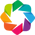

In [2]:
%pylab inline
import geoviews as gv
import geopandas as gpd
import holoviews as hv
import pandas as pd
import xarray as xr
import ogr
import cartopy
from metsim import MetSim
from dask_jobqueue import PBSCluster
from dask.distributed import Client

hv.notebook_extension('bokeh')

In [3]:
# Run MetSim on a scheduler to make sure we have enough memory
# Rough guesstimate is you need (8 * chunksize * 10 * nTimesteps / 1e9) GB of memory per worker. 
# For 40 years of hourly output with 14 HRU/chunk that's about 0.5 GB / worker, so you might need something around 24 GB with 48 workers,
NCORES=48
cluster = PBSCluster(n_workers = NCORES,
                     cores=NCORES,
                     processes=NCORES, 
                     memory="48GB",
                     project='UWAS0091',
                     queue='regular',
                     walltime='02:00:00')
client = Client(cluster)
client.write_scheduler_file('./scheduler.json')

### Check that have workers, do not run the rest of the cells until the workers show up. 

In [4]:
print(client)
!qstat

<Client: 'tcp://10.148.6.77:33103' processes=0 threads=0, memory=0 B>
Job id            Name             User              Time Use S Queue
----------------  ---------------- ----------------  -------- - -----
2916748.chadmin1  Jupyter          ashleyvb          00:11:02 R regular         
2917094.chadmin1  dask-worker      ashleyvb                 0 Q regular         


<br>

### You will need to edit these paths to be your folders

In [5]:
# Some folder places
top = '/glade/work/ashleyvb'
folder = top+'/CAMELs'
folders = folder+'/summa_camels'
shapefile = folder+'/basin_set_full_res_simple/HCDN_nhru_final_671.shp'

<br>

# Our study location: the CAMELs basins

We are using MetSim on unstructured mesh arrangements as well as the structured latitude-longitude grid that we ran in the command line examples.
We will use a setup which consists of 671 "hydrologic response units" or HRU.
A HRU typically delineates a watershed by topography, soil type, land use, or other defining feature.
Here, each CAMELs basin is run as a lumped model, so each one is an HRU.

Let's take a look. 
Because this is an unstructured mesh we will be defining the mesh elements by their respective basin identifiers. 

In [6]:
file_list = []
filelist = open(folders+'/settings.v1/forcingFileList.1hr.txt', 'r')
for lineNumber, line in enumerate (filelist):
   file_list.append(folders+'/forcing/1hr/'+line.strip("'\n"))
filelist.close()

In [7]:
# Some things get dumped with open_mfdataset, so keep them here
extra_vars0 = xr.open_dataset(file_list[0]) 
extra_vars0 = extra_vars0.assign_coords(hru=extra_vars0['hruId'])

### THIS IS IMPORTANT! Select here what basins you want to run. 

In [8]:
# All HRUs, select out all or some to look at, assuming have GRUs same as HRUs here
the_hru = np.array(extra_vars0['hruId'])
the_hru = np.array([2479560,11266500, 6191500,12189500,2092500]) # select some, comment out to run all
the_gru = the_hru
extra_vars = extra_vars0.sel(hru=the_hru)
print(the_hru)

[ 2479560 11266500  6191500 12189500  2092500]


In [9]:
gdf = gpd.read_file(shapefile)
shapes = cartopy.io.shapereader.Reader(shapefile)
list(shapes.records())[0]

<Record: <shapely.geometry.polygon.Polygon object at 0x2b71c2995e80>, {'hru_id': 1013500, 'ann_P': 0.0, 'lon_cen': -68.56551, 'lat_cen': 47.01169, 'AREA': 2303988086.78, 'elev_mean': 277.493489583, 'ave_T': None, 'july_T': None, 'Perimeter': 647993}, <fields>>

In [10]:
# Convert the data from an xarray dataset to a pandas dataframe 
out_df = extra_vars0['hru']
out_df = out_df.to_dataframe()
# Make sure we have some metadata to join with the shapefile
out_df['hru_id'] = gdf['hru_id'].values
#search for the ones with desired records
find_rec = out_df.loc[the_hru,:]['hru_id']
#look at attributes
desired_shapes = []
for i in find_rec:
    for s in shapes.records():
        if s.attributes['hru_id'] == i :
            desired_shapes.append(s)

In [11]:
# Create backgound
mapp =gv.tile_sources.StamenTerrainRetina.opts(width=900, height=500)
# Create the shape plot
poly = gv.Shape.from_records(shapes.records(), out_df, index=['hru_id'], on='hru_id',crs=cartopy.crs.PlateCarree())
poly2 = gv.Shape.from_records(desired_shapes,out_df.loc[the_hru,:],on='hru_id', crs=cartopy.crs.PlateCarree())
poly = poly.opts(cmap='plasma', tools=['hover'], colorbar=True, alpha=0.8)
poly2 = poly2.opts(fill_color='cyan', line_color='cyan', alpha=0.8)
# Plot
mapp*poly*poly2

:Overlay
   .WMTS.I      :WMTS   [Longitude,Latitude]
   .Polygons.I  :Polygons   [Longitude,Latitude]   (hru_id)
   .Polygons.II :Polygons   [Longitude,Latitude]

Basins are colored by index values and are hoverable for index values and IDs. Selected basins are higlighted in cyan.

<br>

# Make SUMMA files the correct HRUs
We have to select out only the HRUs of the basins we are using.

In [12]:
# Attributes 
attrib = xr.open_dataset(folders+'/settings.v1/attributes.camels.v2.nc')
attrib = attrib.assign_coords(hru=attrib['hruId'])
attrib = attrib.assign_coords(gru=attrib['gruId'])
gg = attrib['gruId'] # save because gruId was missing from the parameter file
attrib = attrib.sel(hru=the_hru)
attrib = attrib.sel(gru=the_gru)
attrib = attrib.drop(['hru','gru']) #summa doesn't like these to have coordinates
attrib.to_netcdf(folders+'/settings.v1/attributes.nc')

In [13]:
# Parameters
param = xr.open_dataset(folders+'/settings.v1/trialParams.camels.v1.nc')
param = param.assign_coords(hru=param['hruId'])
param = param.assign_coords(gru=gg) # there should be a gruId in here, but there wasn't
param = param.sel(hru=the_hru)
param = param.sel(gru=the_gru)
param = param.drop(['hru','gru']) #summa doesn't like these to have coordinates
param.to_netcdf(folders+'/settings.v1/parameters.nc')

<br>
Lastly we will need to make the constant initial conditions file.

### You will need to edit these paths to be your folders

In [14]:
! cd /glade/work/ashleyvb/CAMELs/summa_camels/settings.v1; source activate /glade/work/ashleyvb/miniconda3/envs/pysumma; python gen_coldstate.py attributes.nc init_cond.nc int

read output outPolyIds ('hruId') from example domain file
writing output file
adding data
adding data
adding data
adding data
adding data
adding data
adding data
adding data
adding data
adding data
adding data
adding data
adding data
adding data
adding data
adding data
adding data
adding data


<br>

# Forcing files of NLDAS with Constant Daily Values
Here we make the NLDAS data hourly values into constant 24 hourly values for each forcing variable. 
We need to make these 24 hours represent a local day, so local time zones, such that later calculations on days work. 
Since SUMMA will impose that shortwave radiation is 0 when the sun is below the horizon, we distribute the constant shortwave radiation only during the daylight hours.
Other changes inside SUMMA are that specific humidity will be lowered in order that relative humidity does not exceed 100%, and tiny windspeeds will be elimated.

<br>
Merge everything in the folder along time. This takes ~2 minutes.
We set 'minimal' so it won't add the time dimension to the variables that don't have it.

In [15]:
%%time
truth = xr.open_mfdataset(folders+'/forcing/1hr/*.nc',data_vars='minimal',combine='by_coords').load()
truth = truth.assign_coords(hru=truth['hruId'])
truth = truth.sel(hru=the_hru)

CPU times: user 33.4 s, sys: 19.8 s, total: 53.2 s
Wall time: 1min 56s


In [16]:
# Fix time encoding to be the same since the merge drops it
truth.time.encoding = extra_vars.time.encoding
# Also fix the variables that have no time dimension as they may get merged incorrectly by open_mfdataset
truth['data_step'] = extra_vars['data_step']
# Pull out HRUs
truth = truth.assign_coords(hru=truth['hruId'])
truth = truth.sel(hru=the_hru) # none of these in in here, so maybe a dummy file

<br>
Write this file for pySUMMA forcing and save the forcing file name.

In [17]:
# save
t0 = truth['time'].values[0] 
tl = truth['time'].values[-1]
t0_s = pd.to_datetime(str(t0))
t0_sf =t0_s.strftime('%Y%m%d')
tl_s = pd.to_datetime(str(tl))
tl_sf =tl_s.strftime('%Y%m%d')
ffname ='NLDAStruth_' + t0_sf +'-' + tl_sf +'.nc'
truth.to_netcdf(folders+'/forcing/truth/'+ffname)
fflistname = folders+'/settings.v1/forcingFileList.truth.txt' 
file =open(fflistname,"w")
file.write(ffname)
file.close()

<br>
Now we can make the daily data, first shifting to local time zones with longitude.

In [18]:
# Separate out variables with no time dimension and add offset
ds = truth
ds_withtime = ds.drop_vars([ var for var in ds.variables if not 'time' in ds[var].dims ])
ds_timeless = ds.drop_vars([ var for var in ds.variables if     'time' in ds[var].dims ])
DEG_PER_REV = 360.0       # Number of degrees in full revolution
HRS_PER_DAY = 24
offset = (attrib['longitude'] / DEG_PER_REV) * HRS_PER_DAY
offset = offset.astype(int)
ds_withtime['offset'] = offset
ds_withtime = ds_withtime.assign_coords(hru=ds_timeless['hruId'])

<br>
Here are the time zone changes. 
This takes about a minute using all 671 basins; a subset of basins should be shorter.

In [19]:
%%time
for t in np.unique(offset.data):
    ds = ds_withtime.where(offset==t,drop=True)
    ds = ds.shift(time=t)
    if t==np.unique(offset.data)[0]: ds0 = ds
    if t>np.unique(offset.data)[0]: ds0 = xr.concat([ds0,ds],dim='hru')
    print(t)

-8
-7
-5
CPU times: user 145 ms, sys: 48.5 ms, total: 194 ms
Wall time: 186 ms


In [20]:
# Sort back, and drop offset, keep airtemp for later calculations
ds_withtime = ds0.sortby('hru')
ds_withtime = ds_withtime.drop_vars('offset') 
air24 = ds_withtime.get('airtemp')

<br>
Downsample hourly time-series data to daily data. 
This takes about a 30 seconds.

In [21]:
%%time
truth24 = xr.merge([ds_timeless, ds_withtime.resample(time='1D').mean()]).load()
# Fix time encoding to be the same since the merge drops it
truth24.time.encoding = extra_vars.time.encoding

CPU times: user 28.1 s, sys: 863 ms, total: 29 s
Wall time: 28.2 s


<br>
Then we upsample this back to hourly data for constant daily values. 
We need to undo the time zone changes after we upsample. 
This whole process takes about a minute using all 671 basins; a subset of basins should be shorter.

In [22]:
# Add a fake day of data so upsamples until the end
day_fake = truth24.isel(time=-1)['time']+np.timedelta64(1,'D')
add_fake = truth24.isel(time=-1)
add_fake['time'] = day_fake
truth24_add = xr.concat([truth24, add_fake], dim='time',data_vars='minimal')

In [23]:
%%time
# Again we have to separate out variables with no time dimension.
ds = truth24_add
ds_withtime = ds.drop_vars([ var for var in ds.variables if not 'time' in ds[var].dims ])
ds_timeless = ds.drop_vars([ var for var in ds.variables if     'time' in ds[var].dims ])
ds_withtime = ds_withtime.resample(time='1H').ffill()
ds_withtime['offset'] = offset
ds_withtime = ds_withtime.assign_coords(hru=ds_timeless['hruId'])
for t in np.unique(offset.data):
    ds = ds_withtime.where(offset==t,drop=True)
    ds = ds.shift(time=-t)
    if t==np.unique(offset.data)[0]: ds0 = ds
    if t>np.unique(offset.data)[0]: ds0 = xr.concat([ds0,ds],dim='hru')
    print(t)

-8
-7
-5
CPU times: user 187 ms, sys: 22.6 ms, total: 210 ms
Wall time: 202 ms


In [24]:
# Sort back, and drop offset, and merge
ds_withtime = ds0.sortby('hru')
ds_withtime = ds_withtime.drop_vars('offset') 
constant_all = xr.merge([ds_timeless, ds_withtime])
constant_all = constant_all.sel(hru=the_hru) #put back in original order

In [25]:
# Take extra day off
constant_all = constant_all.isel(time=slice(0,-1))
# Fix time encoding to be the same since the merge drops it
constant_all.time.encoding = extra_vars.time.encoding

<br>

## Scale Constant SW Radiation
Edit the constant daily shortwave radiation so that energy is the same in the "truth" when pySUMMA makes the shortwave radiation zero during the day.  

In [26]:
# Find where 0's shoud be based on original NLDAS data
zero_one = truth['SWRadAtm']/truth['SWRadAtm']
zero_one = zero_one.fillna(0)

In [27]:
# Find how much too small shortwave is each day if we use these 0's
swr0 = zero_one*constant_all['SWRadAtm']
div = swr0.resample(time='1D').mean()/constant_all['SWRadAtm'].resample(time='1D').mean()

In [28]:
# Upsample, again add a fake day of data so upsamples until the end
add_fake = div.isel(time=-1)
add_fake['time'] = day_fake
div_add = xr.concat([div, add_fake], dim='time')
div_add = div_add.resample(time='1H').ffill()

# Take extra day off
div = div_add.isel(time=slice(0,-1))

In [29]:
# Finally add back in this constant shortwave radiation
swr0 = swr0/div
constant_all['SWRadAtm']=swr0

<br>
Finally, write this file for pySUMMA forcing and save the forcing file name.

In [30]:
t0 = constant_all['time'].values[0] 
tl = constant_all['time'].values[-1]
t0_s = pd.to_datetime(str(t0))
t0_sf =t0_s.strftime('%Y%m%d')
tl_s = pd.to_datetime(str(tl))
tl_sf =tl_s.strftime('%Y%m%d')
ffname ='NLDASconstant_all_forcing_' + t0_sf +'-' + tl_sf +'.nc'
constant_all.to_netcdf(folders+'/forcing/constant/'+ffname)
fflistname = folders+'/settings.v1/forcingFileList.constant_all.txt' 
file =open(fflistname,"w")
file.write(ffname)
file.close()

<br>

## Files with Only One Variable Constant
Now make files with only one variable held at daily means and save forcing file names.

In [31]:
constant_vars=['airpres','airtemp','LWRadAtm','pptrate','spechum','SWRadAtm','windspd']
for v in constant_vars:
    constant_one = truth.copy()
    constant_one[v]= constant_all[v]
    ffname ='NLDASconstant_' + v +'_forcing_' + t0_sf +'-' + tl_sf +'.nc'
    constant_one.to_netcdf(folders+'/forcing/constant/'+ffname)
    fflistname = folders+'/settings.v1/forcingFileList.constant_' + v + '.txt' 
    file =open(fflistname,"w")
    file.write(ffname)
    file.close()
    print(v)

airpres
airtemp
LWRadAtm
pptrate
spechum
SWRadAtm
windspd


<br>

# MetSim Input Setup

Now we can use the daily NLDAS file to setup MetSim. We need to separate the raw data into a domain file (the attributes of the domain), a state file (the data for the first 90 days), and a forcing file (the data after 90 days). Here's the starting data.

In [32]:
# Calculate daily max and min temps, get precip, and wind speed, and fix units
truth24_met = truth24.get(['pptrate','windspd'])
truth24_met['maxtemp'] = air24.resample(time='1D').max()-273.15 # units C from K
truth24_met['mintemp'] = air24.resample(time='1D').min()-273.15 # units C from K
truth24_met['pptrate'] = truth24_met['pptrate']*3600*24 # units mm/day from mm/s

<br>
Next we need to make the domain file from the attributes. Also in the domain file, we need to add the parameters for the Precipitation Isosceles Triangle (PITRI) precipitation disaggregation method (Bohn et al., 2019), which have been calculated for a lat long grid here https://zenodo.org/record/2564019#.XorEBW5S_xU. We load this file and identify the parameters closest to each HRU lat long.

In [33]:
domain = attrib.get(['latitude','longitude','elevation'])
# Add the mask to domain
shape = (len(truth24_met['hru']), )
coords = {'hru': truth24_met['hru'] }
domain['mask'] = xr.DataArray(data=np.full(shape,1),
                          coords=coords,dims=('hru',),
                          name='mask')

In [34]:
# Add t_pk and dur from the Bohn grid
par_precip = xr.open_dataset(folder+'/MetSim/input/domain.CONUS_MX.L2015.nc')
# Load so the select only operates one one HRU at a time instead of HRU*HRU
t_pk = par_precip['t_pk'].load()
# Identifing by nearest neighbor
# reset coords to get rid of lat and long as coords and on.isel(time=slice(0))ly select t_pk, dur as variables
t_pk_sel = t_pk.sel(lat=domain['latitude'],lon=domain['longitude'],method='nearest').reset_coords()['t_pk'] 

In [35]:
dur = par_precip['dur'].load() #
dur_sel = dur.sel(lat=domain['latitude'],lon=domain['longitude'],method='nearest').reset_coords()['dur']

In [36]:
domain['t_pk'] = t_pk_sel 
domain['dur'] = dur_sel 
domain.to_netcdf(folder+'/MetSim/input/DAILYnldas_domain.nc')
print(domain)

<xarray.Dataset>
Dimensions:    (hru: 5, month: 12)
Coordinates:
  * hru        (hru) int64 2092500 2479560 6191500 11266500 12189500
  * month      (month) int64 0 1 2 3 4 5 6 7 8 9 10 11
Data variables:
    latitude   (hru) float64 31.15 37.74 44.67 48.2 35.04
    longitude  (hru) float64 -88.39 -119.5 -110.3 -121.3 -77.59
    elevation  (hru) float64 ...
    mask       (hru) int64 1 1 1 1 1
    t_pk       (month, hru) float32 637.2 870.60004 871.8 ... 804.0 963.6 321.0
    dur        (month, hru) float32 245.40001 384.0 402.6 ... 441.6 251.40001
Attributes:
    history:                    Tue Dec 31 11:39:11 2019: ncks -A gruId.nc lo...
    NCO:                        netCDF Operators version 4.7.9 (Homepage = ht...
    history_of_appended_files:  Tue Dec 31 11:39:11 2019: Appended file gruId...


<br>
Lastly, separate out the state and forcing files in the met data.

In [37]:
# Create the state file
state = truth24_met.isel(time=slice(0,90))
state.to_netcdf(folder+'/MetSim/input/DAILYnldas_state.nc')
print(state)

<xarray.Dataset>
Dimensions:  (hru: 5, time: 90)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 1980-03-30
  * hru      (hru) int64 2092500 2479560 6191500 11266500 12189500
Data variables:
    pptrate  (time, hru) float32 0.22054102 0.0002208924 ... 0.0 0.18063506
    windspd  (time, hru) float32 3.831915 3.8609993 ... 4.832772 4.1187577
    maxtemp  (time, hru) float32 10.625427 11.543518 ... 3.822937 4.2110596
    mintemp  (time, hru) float32 6.0426636 3.791748 ... -6.732147 -3.0473022


In [38]:
# Print these if things are going wrong
#print(state.time.encoding)
#print(xr.open_dataset(folder+'/MetSim/input/DAILYnldas_state.nc', decode_times=False).time[0])
#print(xr.open_dataset(folder+'/MetSim/input/DAILYnldasINIT.nc', decode_times=False).time[0])

In [39]:
# Create the forcing file for MetSim
forcing = truth24_met.isel(time=slice(90,None)) #should be slice(90,None)
forcing.to_netcdf(folder+'/MetSim/input/DAILYnldas_forcing.nc')
print(forcing)

<xarray.Dataset>
Dimensions:  (hru: 5, time: 14155)
Coordinates:
  * time     (time) datetime64[ns] 1980-03-31 1980-04-01 ... 2018-12-31
  * hru      (hru) int64 2092500 2479560 6191500 11266500 12189500
Data variables:
    pptrate  (time, hru) float32 0.71817005 0.0 2.5389364 ... 0.0 1.3262734
    windspd  (time, hru) float32 4.1703696 3.4334652 ... 5.2611604 2.6032882
    maxtemp  (time, hru) float32 22.896149 20.4888 ... -5.104309 -2.6705322
    mintemp  (time, hru) float32 10.901581 7.8058167 ... -13.51767 -8.529999


<br>

# MetSim Parameters and Instantiation

While in the scripting enviornment we will provide the configuration as a Python dictionary. 
The information that this dictionary, which we will call `params`, is similar to that which is found in the configuration file.
However, there are some notable differences which we will walk through.

First, note that we must provide dates as `datetime` objects that is the time of the forcing file 
This is easily handled via `pandas`. 
Most variables are self-explanatory, so we only define
* `time_step` - this is the time step of the output (in minutes). There are some limiataions on what this is allowed to be. Of course, it can't be greater than 1440 (number of minutes in a day). But it also must be less than 360 (or 6 hours) for numerical reasons. We also should note that, while you can go down to output on the minute, it really doesn't make sense to set this lower than 30.
* `scheduler` - the scheduler is how MetSim manages jobs under the hood. We can now use the `distributed` scheduler in this sort of interactive environment and it will be much faster than `threading`. We've already set this up above to have enough memory.
* `chunks` - this specifies how the domain will be broken up spatially to be run as a separate job. We set it to {'hru': 14} to have 14 HRUs run at a time
* `numworkers` - this multiplied by `chunks` should be around the number of hrus; here 671. We can't have more than 48 workers, but we need to have a lot so each worker does not exceed it's memory.  

In [40]:
t0 = forcing['time'].values[0] 
tl = forcing['time'].values[-1]

In [41]:
# rest of the workflow
dates = pd.date_range(t0,tl)
params = {
    # Run parameters, timestep, start, and stop dates
    'time_step'    : "60",       
    'start'        : dates[0],
    'stop'         : dates[-1],
    # Where all of our input files are
    'forcing'      : folder+'/MetSim/input/DAILYnldas_forcing.nc',     
    'domain'       : folder+'/MetSim/input/DAILYnldas_domain.nc',
    'state'        : folder+'/MetSim/input/DAILYnldas_state.nc',
    # The format of the forcing data
    'forcing_fmt'  : 'netcdf',
    # Distribution of precipitation. Under mix, the “uniform” method is used on days when t_min < 0 C, and “triangle” is used on all
    # other days; this hybrid method retains the improved accuracy of “triangle” in terms of warm season runoff but avoids the biases in
    # snow accumulation that the “triangle” method sometimes yields due to fixed event timing within the diurnal cycle of temperature. 
    'prec_type'  : 'mix',
    # Whether to use UTC timecode offsets for shifting timeseries. Without this option all times should be considered local 
    #to the gridcell being processed. Large domain runs probably want to set this option to True.
    'utc_offset'  : 'True',
    # tmax_daylength_fraction :: float : Weight for calculation of time of maximum daily temperature. Must be between 0 and 1. Defaults to 0.67. 
    'tmax_daylength_fraction': 0.67,
    # Specification of the output
    'out_dir'      : folder+'/MetSim/output',
    'output_prefix': 'DAILYnldas',
    # This does not work, it keeps the output at default names
    'out_vars'     :
         {'temp':'airtemp', 
          'prec':'pptrate', 
          'shortwave':'SWRadAtm', 
          'longwave':'LWRadAtm', 
          'spec_humid':'spechum', 
          'air_pressure':'airpres', 
          'wind':'windspd'},
    # also available 'tsck' (cloud cover frac), 'rel_humid','vapor_pressure'
    # Scheduler to use for job management - see text above for more information
    'scheduler'      :'./scheduler.json',
    # This is analagous to the [chunks] section from the config file
    'num_workers'    : 24,
    'chunks'       : 
        {'hru': 7},
    # This is analagous to the [forcing_vars] section from the config file
    'forcing_vars' : 
         {'pptrate': 'prec', 
          'maxtemp': 't_max', 
          'mintemp': 't_min', 
          'windspd': 'wind'},
    # This is analagous to the [state_vars] section from the config file
    'state_vars'   : 
         {'pptrate': 'prec', 
          'maxtemp': 't_max', 
          'mintemp': 't_min', 
          'windspd': 'wind'},
    # This is analagous to the [domain_vars] section from the config file
    'domain_vars'  : 
        {'elevation': 'elev', 
         'latitude': 'lat', 
         'longitude': 'lon', 'mask': 'mask',
          'dur':'dur',
          't_pk':'t_pk'}
    }

<br>
Now create the object and run the simulation. This takes about 3 minutes using all 671 basins and shorter with fewer basins.

In [42]:
ms = MetSim(params)

In [43]:
%%time
ms.run()

CPU times: user 1.43 s, sys: 123 ms, total: 1.56 s
Wall time: 44.7 s


<br>

# Modify MetSim Output to pySUMMA Input

Let's look at the MetSim output. It's got the 671 HRU each with 339720 timesteps (equal to 14155 * 24).
We have 7 variables:
 - temperature (C)
 - precipitation (mm/hr)
 - shortwave radiation (W/m^2)
 - longwave radiation (W/m^2)
 - specific humidity (g/g)
 - air pressure (kPa)
 - wind speed (m/s)
 
Other options that we do not need for pySumma but we could make:
 - vapor pressure (kPa)
 - relative humidity (%)
 - cloud cover fraction

In [56]:
t0_s = pd.to_datetime(str(t0))
t0_sf =t0_s.strftime('%Y%m%d')
tl_s = pd.to_datetime(str(tl))
tl_sf =tl_s.strftime('%Y%m%d')
# With distributed we need to read the file instead of just the ms.open_output()
ms_out = xr.open_dataset(folder+'/MetSim/output/forcing_' + t0_sf +'-' + tl_sf +'.nc') 
ms_out = ms_out.sel(hru=the_hru) #put back in original order
print(ms_out)

<xarray.Dataset>
Dimensions:       (hru: 5, time: 339720)
Coordinates:
  * time          (time) datetime64[ns] 1980-03-31 ... 2018-12-31T23:00:00
  * hru           (hru) int64 2479560 11266500 6191500 12189500 2092500
Data variables:
    temp          (time, hru) float32 ...
    prec          (time, hru) float32 ...
    shortwave     (time, hru) float32 ...
    longwave      (time, hru) float32 ...
    spec_humid    (time, hru) float32 ...
    air_pressure  (time, hru) float32 ...
    wind          (time, hru) float32 ...
Attributes:
    conventions:              1.6
    title:                    Output from MetSim
    institution:              University of Washington
    source:                   metsim.py
    history:                  Created: Mon Jun 29 04:34:07 2020 by ashleyvb
    references:               Thornton, P.E., and S.W. Running, 1999. An impr...
    comment:                  no comment at this time
    period_ending:            False
    method:                   mtcli

<br>
To use this for forcing in pySUMMA, we will need to rename some variables, change the units, add a few variables, and fix the time encoding before we write the file. 
This first step takes about a minute using all 671 basins; a subset of basins should be shorter.

In [57]:
%%time
# Rename variables
ms_pysum = ms_out.rename({
          'temp':'airtemp', 
          'prec':'pptrate', 
          'shortwave':'SWRadAtm', 
          'longwave':'LWRadAtm', 
          'spec_humid':'spechum', 
          'air_pressure':'airpres', 
          'wind':'windspd'}).load()

CPU times: user 32.6 ms, sys: 11 ms, total: 43.5 ms
Wall time: 42.8 ms


In [58]:
# Change units
ms_pysum['airtemp'] = ms_pysum['airtemp']+273.15 # units K from C
ms_pysum['pptrate'] = ms_pysum['pptrate']/3600 # mm/s, unit kg m-2 s-1, from mm/h
ms_pysum['airpres'] = ms_pysum['airpres']*1000 # units Pa from KPa

In [59]:
# Add in SUMMA variables from original files, or we could write these ourselves
ms_pysum['data_step'] = extra_vars['data_step']

In [60]:
# Fix time encoding to be the same as truth
ms_pysum.time.encoding = extra_vars.time.encoding

<br>
Finally, write this file for pySUMMA forcing and save the forcing file name.

In [61]:
# Add it into truth instead of just writing new file so that all forcing files start at the same time.
metsim_vars=['airpres','airtemp','LWRadAtm','pptrate','spechum','SWRadAtm','windspd']
metsim_one = truth.copy()
for v in metsim_vars:
    metsim_one[v]= ms_pysum[v]
ffname ='NLDASmetsim_' + 'all' +'_forcing_' + t0_sf +'-' + tl_sf +'.nc'
metsim_one.to_netcdf(folders+'/forcing/metsim/'+ffname)
fflistname = folders+'/settings.v1/forcingFileList.metsim_all.txt' 
file =open(fflistname,"w")
file.write(ffname)
file.close()

<br>

## Files with Only One Variable Metsim
Now make files with only one variable held at MetSim and save forcing file names.

In [62]:
for v in metsim_vars:
    metsim_one = truth.copy()
    metsim_one[v]= ms_pysum[v]
    ffname ='NLDASmetsim_' + v +'_forcing_' + t0_sf +'-' + tl_sf +'.nc'
    metsim_one.to_netcdf(folders+'/forcing/metsim/'+ffname)
    fflistname = folders+'/settings.v1/forcingFileList.metsim_' + v +'.txt' 
    file =open(fflistname,"w")
    file.write(ffname)
    file.close()
    print(v)

airpres
airtemp
LWRadAtm
pptrate
spechum
SWRadAtm
windspd


<br>

# Check Files

To make sure things look how we want, we plot the MetSim dataset against the NLDAS "truth" dataset and the constant dataset, and plot the cumulative variables to see how errors are compounding. 
We plot one HRU (the first one) for 2 months.

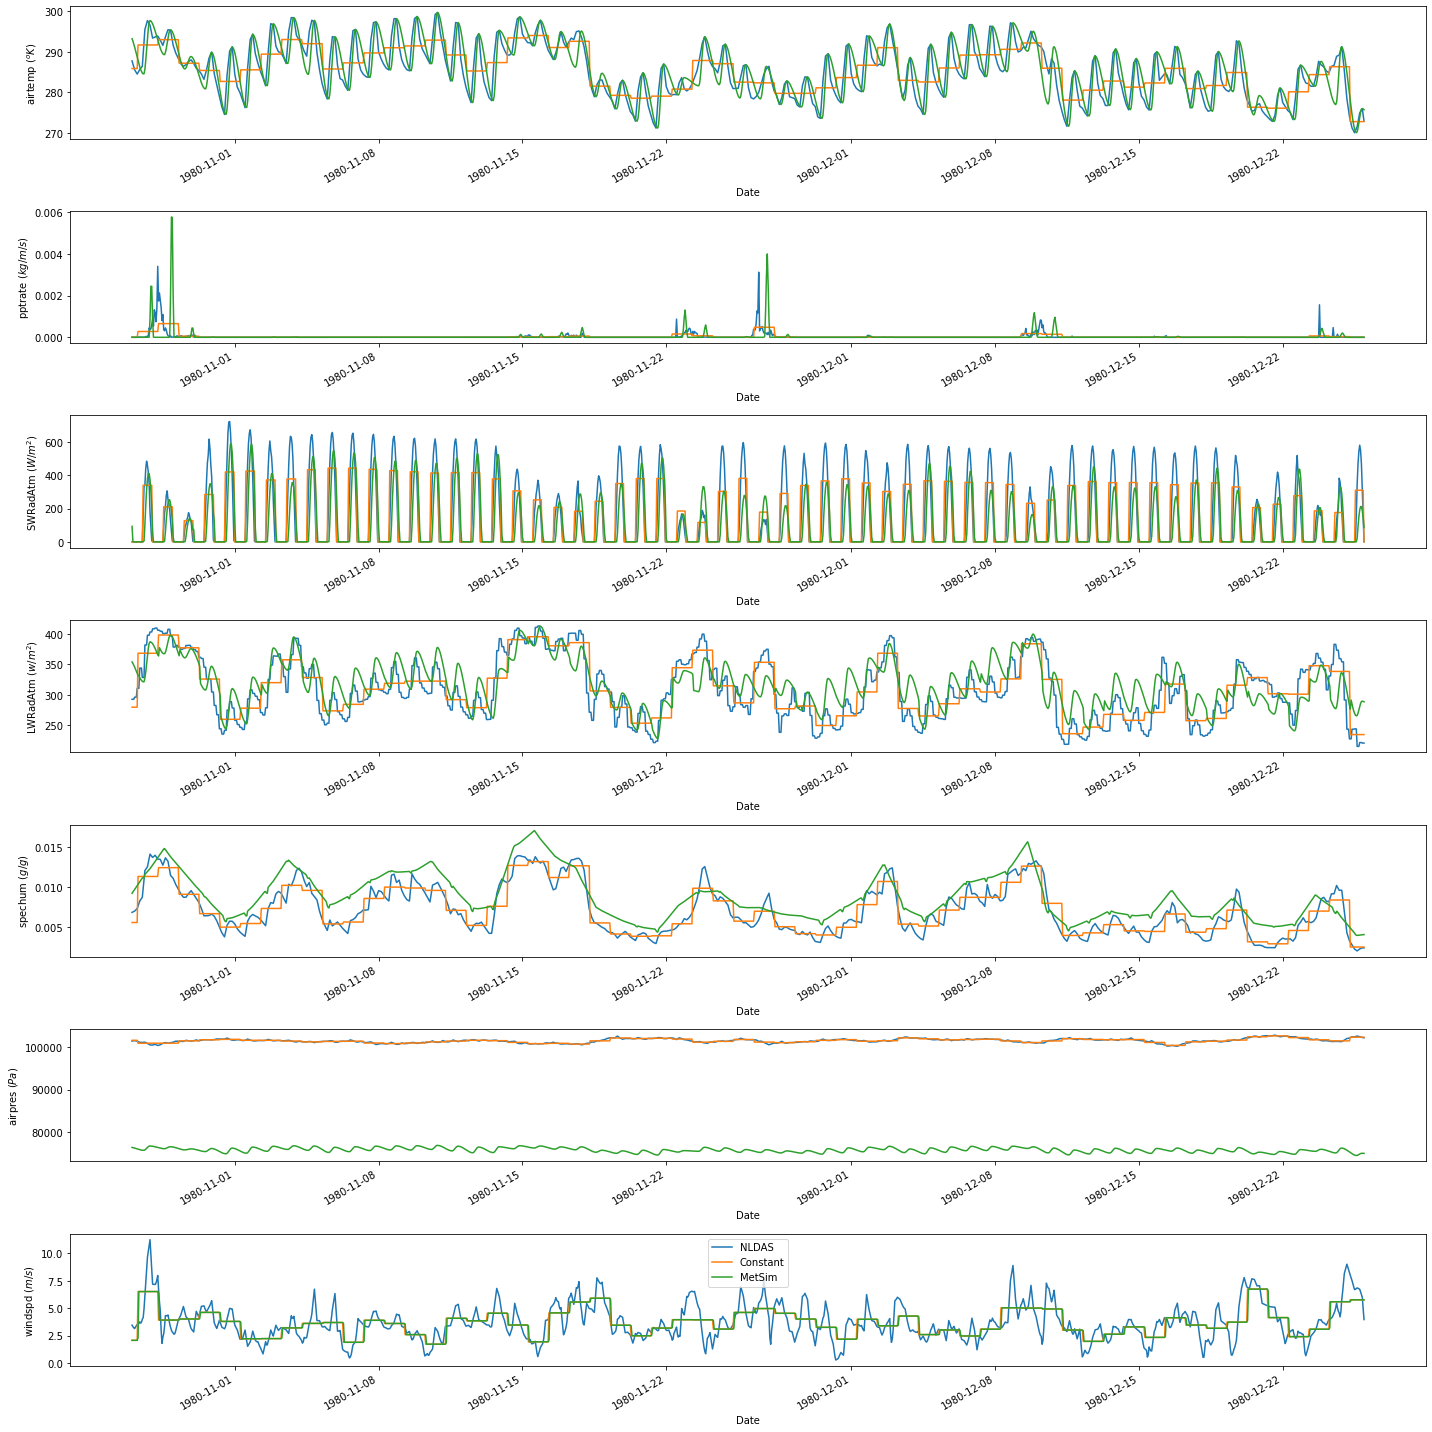

In [66]:
#Plot hourly
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(20, 20))
axes = axes.flatten()
axes[0].set_title('Hourly')

unit_str = ['($ ^o K$)', '($kg/m/s$)', '($W/m^2$)','($w/m^2$)','($g/g$)','($Pa$)', '($m/s$)',]

variables = list(ms_pysum.variables.keys())
dims = list(ms_out.dims.keys())
[variables.remove(d) for d in dims]

start =  24*7*30 
stop = start + 2*30*24 
#truth starts 90 days earlier
truth_plt = truth.isel(hru=0, time=slice(start+90*24, stop+90*24))
constant_all_plt = constant_all.isel(hru=0, time=slice(start+90*24, stop+90*24))
ms_pysum_plt = ms_pysum.isel(hru=0, time=slice(start, stop))

for idx, var in enumerate(variables[0:7]):
    truth_plt[var].plot(ax=axes[idx],label='NLDAS')
    constant_all_plt[var].plot(ax=axes[idx],label='Constant')
    ms_pysum_plt[var].plot(ax=axes[idx],label='MetSim')
    axes[idx].set_title('') 
    axes[idx].set_ylabel('{} {}'.format(var, unit_str[idx]))
    axes[idx].set_xlabel('Date')
plt.tight_layout()
plt.legend()

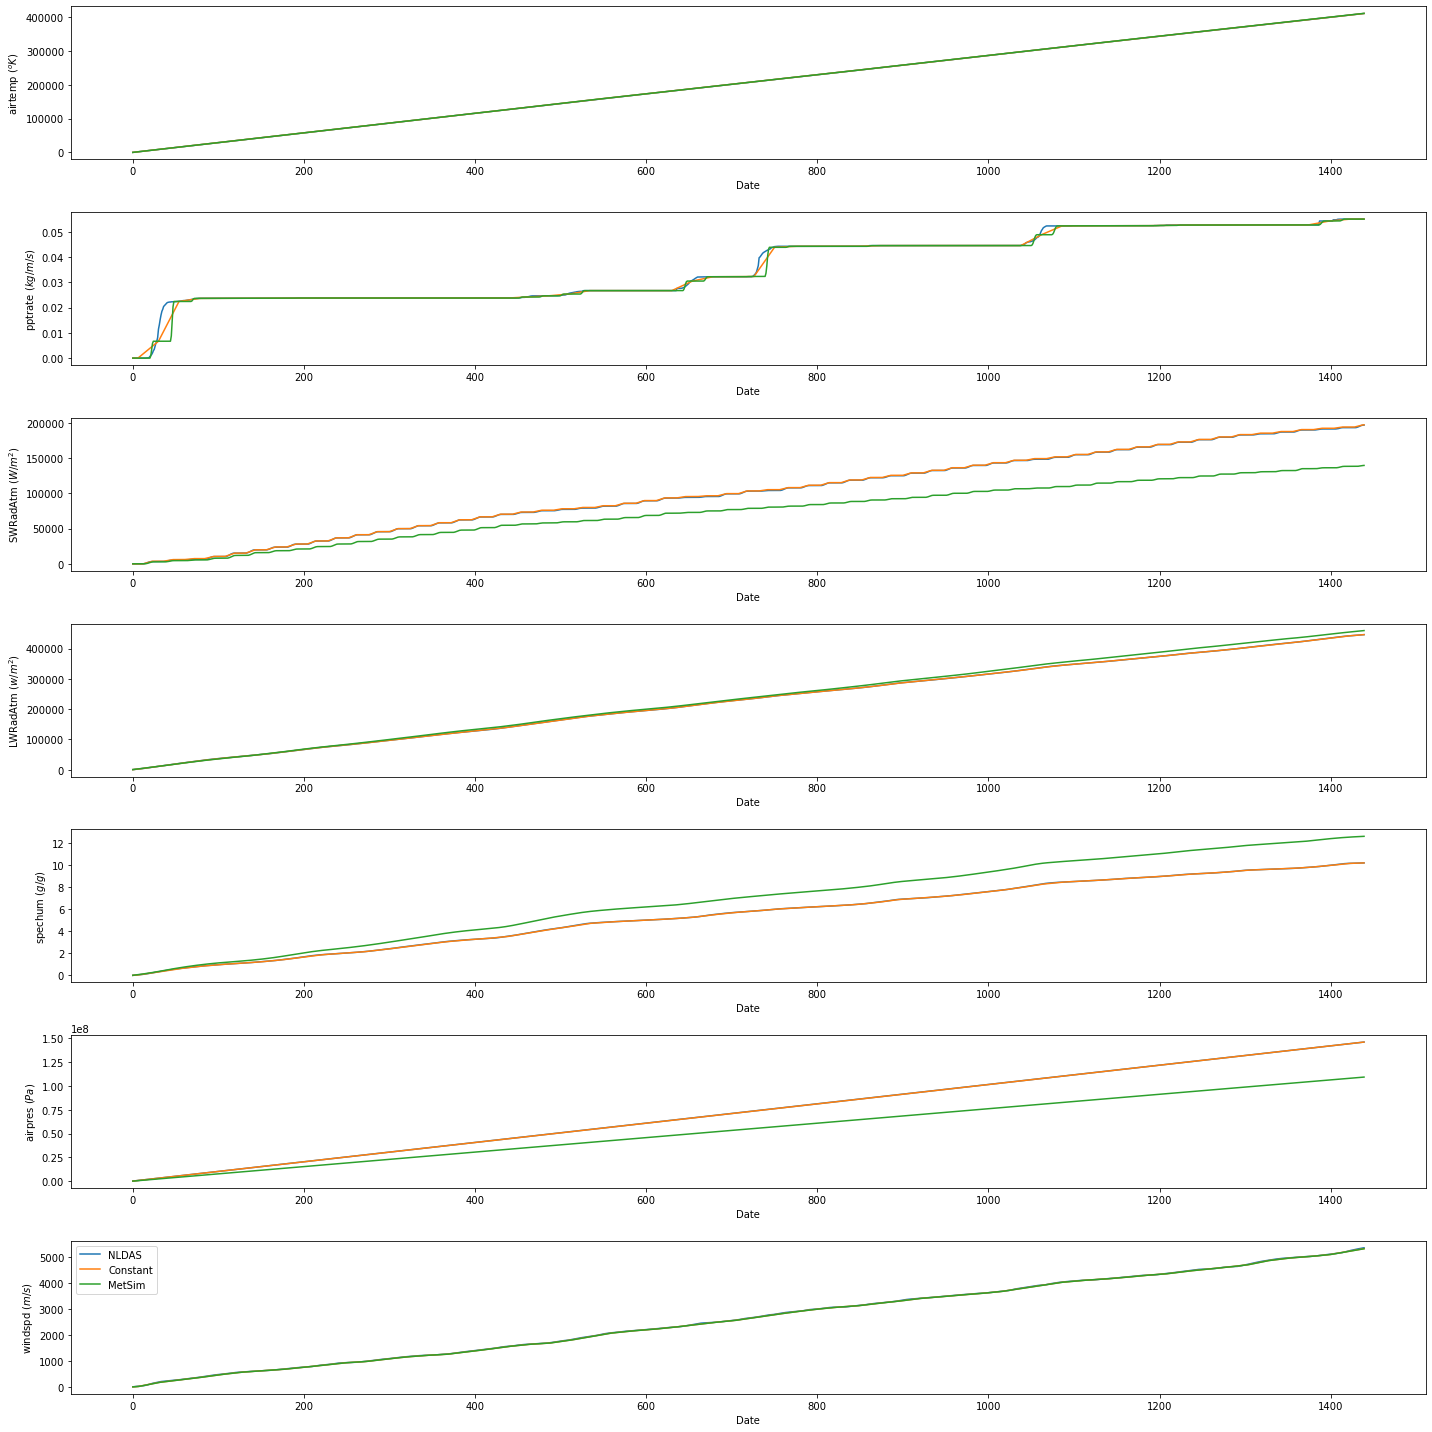

In [67]:
#Plot cummulative
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(20, 20))
axes = axes.flatten()
axes[0].set_title('Cumulative')

truth_plt = truth.isel(hru=0, time=slice(start+90*24, stop+90*24)).cumsum(dim='time')
constant_all_plt = constant_all.isel(hru=0, time=slice(start+90*24, stop+90*24)).cumsum(dim='time')
ms_pysum_plt = ms_pysum.isel(hru=0, time=slice(start, stop)).cumsum(dim='time')

for idx, var in enumerate(variables[0:7]):
    truth_plt[var].plot(ax=axes[idx],label='NLDAS')
    constant_all_plt[var].plot(ax=axes[idx],label='Constant')
    ms_pysum_plt[var].plot(ax=axes[idx],label='MetSim')
    axes[idx].set_title('') 
    axes[idx].set_ylabel('{} {}'.format(var, unit_str[idx]))
    axes[idx].set_xlabel('Date')
plt.tight_layout()
plt.legend()